#### Creating a Dataset which will be used for creating dashboard

In [1]:
import pandas as pd

# Load data
df = pd.read_csv("Telco_customer_churn.csv")

In [2]:
df.isna().sum()

CustomerID              0
Count                   0
Country                 0
State                   0
City                    0
Zip Code                0
Lat Long                0
Latitude                0
Longitude               0
Gender                  0
Senior Citizen          0
Partner                 0
Dependents              0
Tenure Months           0
Phone Service           0
Multiple Lines          0
Internet Service        0
Online Security         0
Online Backup           0
Device Protection       0
Tech Support            0
Streaming TV            0
Streaming Movies        0
Contract                0
Paperless Billing       0
Payment Method          0
Monthly Charges         0
Total Charges           0
Churn Label             0
Churn Value             0
Churn Score             0
CLTV                    0
Churn Reason         5174
dtype: int64

In [3]:
df['Churn Reason'] = df['Churn Reason'].fillna('No churn')

In [4]:
df['Total Charges'] = pd.to_numeric(df['Total Charges'], errors='coerce')
df = df.dropna()

In [5]:
df.shape

(7032, 33)

In [6]:
y = df['Churn Value']

In [7]:
drop_cols = [
    'CustomerID',
    'Country',
    'State',
    'City',
    'Zip Code',
    'Lat Long',
    'Latitude',
    'Longitude',
    'Churn Label',
    'Churn Score',
    'Churn Reason',
    'CLTV'
]
X = df.drop(columns=drop_cols)

In [8]:
X_processed = pd.get_dummies(X, drop_first=True)

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

X_train, X_test, y_train, y_test = train_test_split(
    X_processed, y, test_size=0.2, random_state=42
)

model = LogisticRegression(max_iter=3000)
model.fit(X_train, y_train)

,"penalty penalty: {'l1', 'l2', 'elasticnet', None}, default='l2'Specify the norm of the penalty:- `None`: no penalty is added;- `'l2'`: add a L2 penalty term and it is the default choice;- `'l1'`: add a L1 penalty term;- `'elasticnet'`: both L1 and L2 penalty terms are added... warning:: Some penalties may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionadded:: 0.19 l1 penalty with SAGA solver (allowing 'multinomial' + L1).. deprecated:: 1.8 `penalty` was deprecated in version 1.8 and will be removed in 1.10. Use `l1_ratio` instead. `l1_ratio=0` for `penalty='l2'`, `l1_ratio=1` for `penalty='l1'` and `l1_ratio` set to any float between 0 and 1 for `'penalty='elasticnet'`.",'deprecated'
,"C C: float, default=1.0Inverse of regularization strength; must be a positive float.Like in support vector machines, smaller values specify strongerregularization. `C=np.inf` results in unpenalized logistic regression.For a visual example on the effect of tuning the `C` parameterwith an L1 penalty, see::ref:`sphx_glr_auto_examples_linear_model_plot_logistic_path.py`.",1.0
,"l1_ratio l1_ratio: float, default=0.0The Elastic-Net mixing parameter, with `0 <= l1_ratio <= 1`. Setting`l1_ratio=1` gives a pure L1-penalty, setting `l1_ratio=0` a pure L2-penalty.Any value between 0 and 1 gives an Elastic-Net penalty of the form`l1_ratio * L1 + (1 - l1_ratio) * L2`... warning:: Certain values of `l1_ratio`, i.e. some penalties, may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionchanged:: 1.8 Default value changed from None to 0.0... deprecated:: 1.8 `None` is deprecated and will be removed in version 1.10. Always use `l1_ratio` to specify the penalty type.",0.0
,"dual dual: bool, default=FalseDual (constrained) or primal (regularized, see also:ref:`this equation `) formulation. Dual formulationis only implemented for l2 penalty with liblinear solver. Prefer `dual=False`when n_samples > n_features.",False
,"tol tol: float, default=1e-4Tolerance for stopping criteria.",0.0001
,"fit_intercept fit_intercept: bool, default=TrueSpecifies if a constant (a.k.a. bias or intercept) should beadded to the decision function.",True
,"intercept_scaling intercept_scaling: float, default=1Useful only when the solver `liblinear` is usedand `self.fit_intercept` is set to `True`. In this case, `x` becomes`[x, self.intercept_scaling]`,i.e. a ""synthetic"" feature with constant value equal to`intercept_scaling` is appended to the instance vector.The intercept becomes``intercept_scaling * synthetic_feature_weight``... note:: The synthetic feature weight is subject to L1 or L2 regularization as all other features. To lessen the effect of regularization on synthetic feature weight (and therefore on the intercept) `intercept_scaling` has to be increased.",1
,"class_weight class_weight: dict or 'balanced', default=NoneWeights associated with classes in the form ``{class_label: weight}``.If not given, all classes are supposed to have weight one.The ""balanced"" mode uses the values of y to automatically adjustweights inversely proportional to class frequencies in the input dataas ``n_samples / (n_classes * np.bincount(y))``.Note that these weights will be multiplied with sample_weight (passedthrough the fit method) if sample_weight is specified... versionadded:: 0.17 *class_weight='balanced'*",None
,"random_state random_state: int, RandomState instance, default=NoneUsed when ``solver`` == 'sag', 'saga' or 'liblinear' to shuffle thedata. See :term:`Glossary ` for details.",None
,"solver solver: {'lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'}, default='lbfgs'Algorithm to use in the optimization problem. Default is 'lbfgs'.To choose a solver, you might want to consider the following aspects:- 'lbfgs' is a good default solver because it works reasonably well for a wide class of problems.- For :term:`mul

In [10]:
y_prob = model.predict_proba(X_test)[:, 1]

In [11]:
df_clean = df.loc[X_test.index].copy()

df_clean['Actual'] = y_test
df_clean['Churn Probability'] = y_prob

In [12]:
def risk_level(prob):
    if prob >= 0.5:
        return 'High'
    else:
        return 'Low'

df_clean['Risk Level'] = df_clean['Churn Probability'].apply(risk_level)

In [13]:
df_clean['Risk Level'].value_counts()

Risk Level
Low     1012
High     395
Name: count, dtype: int64

In [14]:
df_clean['Churn Probability'].describe()

count    1407.000000
mean        0.280480
std         0.445305
min         0.000124
25%         0.001202
50%         0.002880
75%         0.988639
max         0.997674
Name: Churn Probability, dtype: float64

<Axes: >

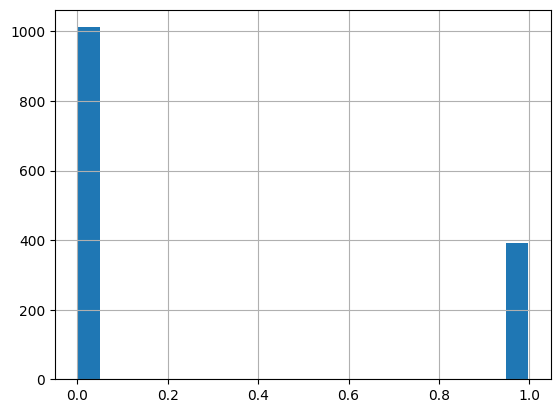

In [15]:
df_clean['Churn Probability'].hist(bins=20)

In [16]:
df_clean.to_csv("churn_dashboard_data.csv", index=False)

In [17]:
df_clean.head()

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason,Actual,Churn Probability,Risk Level
2478,8098-TDCBU,1,United States,California,North Fork,93643,"37.244307, -119.470256",37.244307,-119.470256,Female,...,25.25,1108.20,No,0,53,3052,No churn,0,0.000855,Low
6783,9388-ZEYVT,1,United States,California,Gardena,90247,"33.890853, -118.297967",33.890853,-118.297967,Male,...,44.15,1931.30,No,0,42,2522,No churn,0,0.001965,Low
6125,1818-ESQMW,1,United States,California,San Joaquin,93660,"36.600193, -120.153393",36.600193,-120.153393,Female,...,89.20,2383.60,No,0,54,4384,No churn,0,0.004791,Low
3052,7941-RCJOW,1,United States,California,Tehama,96090,"40.021787, -122.127576",40.021787,-122.127576,Male,...,19.55,1218.65,No,0,76,4309,No churn,0,0.000316,Low
4097,2065-MMKGR,1,United States,California,Diamond Springs,95619,"38.683605, -120.811852",38.683605,-120.811852,Female,...,71.00,2080.10,No,0,32,4226,No churn,0,0.003188,Low
